# Lab 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import sklearn
import matplotlib

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [3]:
df = pd.read_csv("transfusion.data")
df.head()
  

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [4]:
df.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
print(df.head())
print(df.shape)

   Recency  Frequency  Volume  Time  Target
0        2         50   12500    98       1
1        0         13    3250    28       1
2        1         16    4000    35       1
3        2         20    5000    45       1
4        1         24    6000    77       0
(748, 5)


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

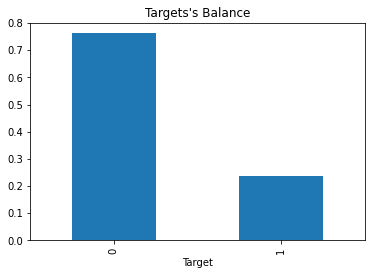

In [5]:
(df.groupby('Target').size()/df.shape[0]).plot(kind="bar",title="Targets's Balance")


In [6]:
target_1 = df['Target'].value_counts()[1]
target_0 = df['Target'].value_counts()[0]
print("Number of target equal to 1  : ")
print(target_1)
print("Number of target equal to 0 : ")
print(target_0)
precision_if_equal_to_1 = target_0 / (target_1 + target_0)
print("if prediction is always equal to 0, we can get", precision_if_equal_to_1, "accuracy")

Number of target equal to 1  : 
178
Number of target equal to 0 : 
570
if prediction is always equal to 0, we can get 0.7620320855614974 accuracy


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

In [7]:
df.corr()

,Recency,Frequency,Volume,Time,Target
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633
Volume,-0.182745,1.000000,1.000000,0.634940,0.218633
Time,0.160618,0.634940,0.634940,1.000000,-0.035854
Target,-0.279869,0.218633,0.218633,-0.035854,1.000000


3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

Text(0, 0.5, 'Volume')

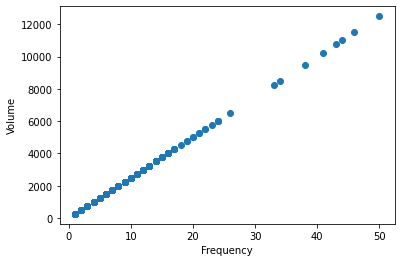

In [8]:
#The most correlated variables are frequency and volume
#(df.groupby('Frequency').size()/df.shape[0]).plot(kind="bar",title="Targets's Balance")
import matplotlib.pyplot as plt

plt.scatter(df['Frequency'], df['Volume'])
plt.xlabel("Frequency")
plt.ylabel("Volume")


In [9]:
#to know what volume is given each time, we divide the total volume by the number of time the donor came
print(df.Volume/df.Frequency)

0      250.0
1      250.0
2      250.0
3      250.0
4      250.0
       ...  
743    250.0
744    250.0
745    250.0
746    250.0
747    250.0
Length: 748, dtype: float64


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [10]:
df.drop('Volume', axis=1, inplace=True)
df.head()

,Recency,Frequency,Time,Target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [11]:
Y = df.Target
X = df.drop('Target', axis = 1, inplace = False)
print (X.columns)

Index(['Recency', 'Frequency', 'Time'], dtype='object')


In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=1)

from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(clf_log, X, Y, scoring='accuracy', cv=5)


print('cross validation r2 =', scores_log.mean() )

cross validation r2 = 0.7727874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1)

from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(clf_rf, X, Y, scoring='accuracy', cv=5)

print('cross validation accuracy =', scores_rf.mean())

cross validation accuracy = 0.6819865771812081


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [14]:
# your code here
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,4,7],'min_samples_split': [2, 4, 6, 8, 10],
          'n_estimators':[20, 30, 40], 'max_depth': [2,3]}

clf_rf2 = RandomForestClassifier(random_state=1)
clf_rf2.fit(X, Y)

clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [20, 30, 40]},
             scoring='accuracy')

7- Print the best score, and the best parameters

In [15]:
print(clf_gs.best_score_)

0.7740223713646532


In [16]:
print(clf_gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30}


8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [23]:
from sklearn.ensemble import RandomForestClassifier

importances = clf_rf2.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

dataframe = pd.DataFrame(sorted_indices)
print(dataframe)

   0
0  2
1  1
2  0


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf2 = RandomForestClassifier(random_state=1)
clf_rf2.fit(X, Y)

clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, Y)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.7740223713646532
{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30}


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [ ]:
# your code here